In [1]:
import operator
import matplotlib
import matplotlib.pyplot as plt
from numpy import *

def createDataSet():
				group = array([(1.0,1.1),(1.0,1.0),(0,0),(0,0.1)])
				labels = ['A','A','B','B']
				return group,labels
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

# group,labels=createDataSet()
# a=classify0([1.2,1],group,labels,3)
# print(a)

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

def datingClassTest():
    hoRatio = 0.10      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt') #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))


the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

NameError: name 'datingDataMat' is not defined

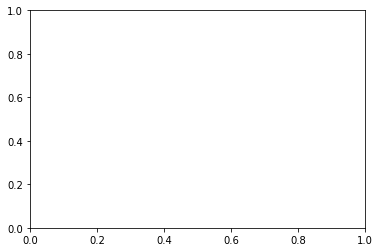

In [4]:
# datingClassTest()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(datingDataMat[:,0],datingDataMat[:,1],
# 	15*array(datingLabels),15*array(datingLabels))
# plt.show()
# normMat, ranges, minVals =autoNorm(datingDataMat)
# print(normMat[:5],ranges,minVals)